<table align="center" width=100%>
    <tr>
       <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> MINI PROJECT 1 Inferential Statistics<br>
                    </b>
                </font>
            </div>
        </td>
        <td width="25%">
            <img src="NEW_GL_Logo.png">
        </td>
    </tr>
</table>

### Question -1(20 Marks)

a.Read the Dataset "turnout.csv" (1 mark)

b.Identify non-numerical inputs and convert into numerical wherever needed (3 marks) (*Hint: Use replace function if needed)

c. Check whether the dataset having null values or not. If yes, do replace them with suitable average value (2 marks) (*Think out of box)

d.Find mean, median and mode for atleast one possible column for each (3 marks)

e.Check the outliers and remove it from the dataset. (3 marks)

f.A city affected by 3 cyclones in a year on an average. Find the probability if the same city will getting affected by exactly 2 cyclones in the upcoming year (4 marks)

g.If an athlete attended  6 olympics in his lifetime. Find the probability if he exactly have 2 wins (4 marks)



In [31]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

### A. Read the Dataset "turnout.csv" (1 mark)

In [32]:
original_data=pd.read_csv('turnout.csv',encoding='ISO-8859-1')
data=original_data.copy()
data.head(5)

,Employee ID,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,1011,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,1012,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,1013,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,1014,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,1015,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7


### B.Identify non-numerical inputs and convert into numerical whatever needed (3 marks) 
(*Hint: Use replace function if needed)

In [33]:
cat_col= pd.DataFrame(data,columns = ['gender','greywage','head_gender'])
cat_col.dtypes

gender         object
greywage       object
head_gender    object
dtype: object

### <font color='green'>INFERENCE: Initially above three columns are in non-numerical format. In other words, they fall under categorical data type</font>

In [34]:
data['gender'].replace({'m':1.0,'f':0.0},inplace=True)
data['head_gender'].replace({'m':1.0,'f':0.0},inplace=True)
data['greywage'].replace({'white':0,'grey':1},inplace=True)

In [35]:
num_col= pd.DataFrame(data,columns = ['gender','head_gender','greywage'])
num_col.dtypes

gender         float64
head_gender    float64
greywage         int64
dtype: object

### <font color='green'>INFERENCE: By using 'replace' function we converted above 3 non-numerical data into numerical data format. This is also confirmed by displaying their data type in the above cell.</font>

### C. Describe the statistical measures using single function (2 marks)

In [36]:
data.describe(include='all')

,Employee ID,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
count,1129.000000,1129.000000,1129.000000,1129.000000,1129,1129,1129,1129,1129.000000,1129.000000,1129,1128.000000,1127.000000,1128.000000,1128.000000,1128.000000
unique,NaN,NaN,NaN,NaN,16,15,8,3,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,Retail,HR,youjs,no,NaN,NaN,bus,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,289,757,318,683,NaN,NaN,681,NaN,NaN,NaN,NaN,NaN
mean,1575.000000,0.505757,0.244464,31.050136,NaN,NaN,NaN,NaN,0.517272,0.112489,NaN,5.593262,5.480479,5.593794,5.667110,5.881560
std,326.058533,0.500188,0.429959,7.419808,NaN,NaN,NaN,NaN,0.499923,0.316107,NaN,1.852222,1.703578,1.977562,1.709213,1.903753
min,1011.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.700000,1.000000
25%,1293.000000,0.000000,0.000000,25.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,4.600000,4.100000,4.100000,4.800000,4.400000
50%,1575.000000,1.000000,0.000000,30.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,5.400000,5.500000,5.700000,5.600000,6.000000
75%,1857.000000,1.000000,0.000000,36.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,7.000000,6.900000,7.200000,7.100000,7.500000


### D.Find mean, median and mode for atleast one possible column for each (3 marks)

In [37]:
# let us consider column 'age'
print("Mean of 'age':",data['age'].mean())
print("Median of 'age':",data['age'].median())
print("Mode of 'age':\n",data['age'].mode())

Mean of 'age': 31.050135512072632
Median of 'age': 30.0
Mode of 'age':
 0    26.0
dtype: float64


### E.Check the outliers and remove it from the dataset. (3 marks)

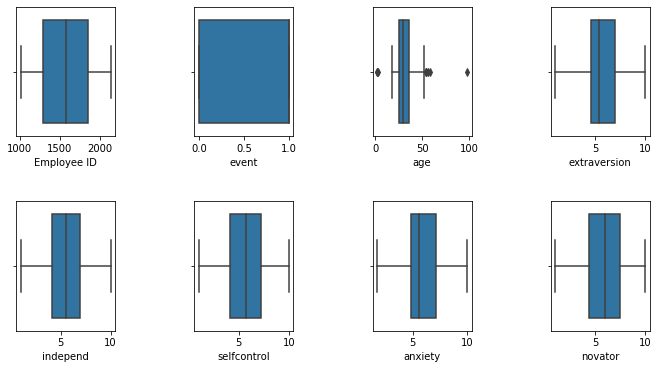

In [38]:
#dimensions of subplots (rows, columns, figsize=(width,height))
fig, axes = plt.subplots(2, 4, figsize=(10,5))

#create chart in each subplot
sns.boxplot(original_data['Employee ID'],ax=axes[0,0])
sns.boxplot(original_data['event'],ax=axes[0,1])
sns.boxplot(original_data['age'],ax=axes[0,2])
sns.boxplot(original_data['extraversion'],ax=axes[0,3])
sns.boxplot(original_data['independ'],ax=axes[1,0])
sns.boxplot(original_data['selfcontrol'],ax=axes[1,1])
sns.boxplot(original_data['anxiety'],ax=axes[1,2])
sns.boxplot(original_data['novator'],ax=axes[1,3])

fig.subplots_adjust(left=0.10, right=0.98, bottom=0, top=0.9,
                    hspace=0.5, wspace=0.8)

In [39]:
mean_age=data['age'].mean()
print("Mean of 'age'=",mean_age)
std_age=data['age'].std()
print("SD of 'age'=",std_age)

u1=mean_age+ 3*std_age
u2=mean_age- 3*std_age
print("u1=",u1,"and u2=",u2)

Mean of 'age'= 31.050135512072632
SD of 'age'= 7.419807601857085
u1= 53.30955831764389 and u2= 8.790712706501377


In [40]:
data_outlier=np.where((data['age']>=u1)| (data['age']<=u2))
print("Values of outliers are:",data_outlier)

Values of outliers are: (array([  18,   77,  139,  181,  461,  462,  638,  741,  898, 1043],
      dtype=int64),)


In [49]:
data.drop(data_outlier[0], inplace = True)

Number of rows in 'age' after removing outliers: (1129,)
Number of rows in 'age' after removing outliers: (1118,)


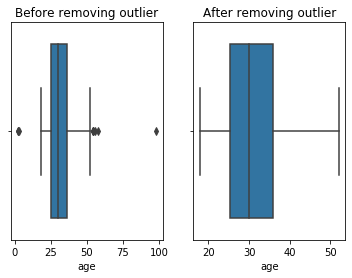

In [51]:
fig, axes = plt.subplots(1,2)
sns.boxplot(original_data['age'],ax=axes[0]).set(title='Before removing outlier')
sns.boxplot(data['age'],ax=axes[1]).set(title='After removing outlier')
print("Number of rows in 'age' after removing outliers:", original_data['age'].shape)
print("Number of rows in 'age' after removing outliers:", data['age'].shape)

### <font color='green'>INFERENCE: The presence of outliers was checked by using boxplot on each & every column. From the plot, it was clear that only column 'Age' had outliers. We extracted those outliers using mean and standard deviation values  i.e., values that lie before (mean- 3*SD) and values that lie after (mean+ 3*SD) are considered as outliers. Boxplot comparison of 'Age' column before and after removing outliers shows that outlier has been removed using above technique.</font>

### F. A city affected by 3 cyclones in a year on an average. Find the probability if the same city will getting affected by exactly 2 cyclones in the upcoming year (4 marks)

In [43]:
from scipy.stats import poisson
#calculate probability
#k=2  --> probability of city being affected by exactly 2 cyclones.
#mu=3 --> average value of city being affected by cyclones.
probability=poisson.pmf(k=2,mu=3)
print("P(exactly 2 cyclones=)",probability)

P(exactly 2 cyclones=) 0.22404180765538775


### <font color='green'>INFERENCE: From the above calculation, we can infer that the probability of city being affected by exactly 2 cyclones in the upcoming year is 22% .</font>

### G.If an athlete attended 6 olympics in his lifetime. Find the probability if he exactly have 2 wins (4 marks)

In [53]:
from scipy.stats import binom
x=2    #probability of exactly 2 wins
n=6    #Number of times attending Olympics
p=0.5  #probability of win
prob=binom.pmf(x,n,p)
print("P(exactly 2 wins=)",prob)

P(exactly 2 wins=) 0.23437500000000003


### <font color='green'>INFERENCE: From the above calculation, we can infer that the probability of having exactly 2 wins in the Olympics is nearly 23% .</font>